Mean Squared Error: 10975182243.442741
R-squared: 0.041186706092897096


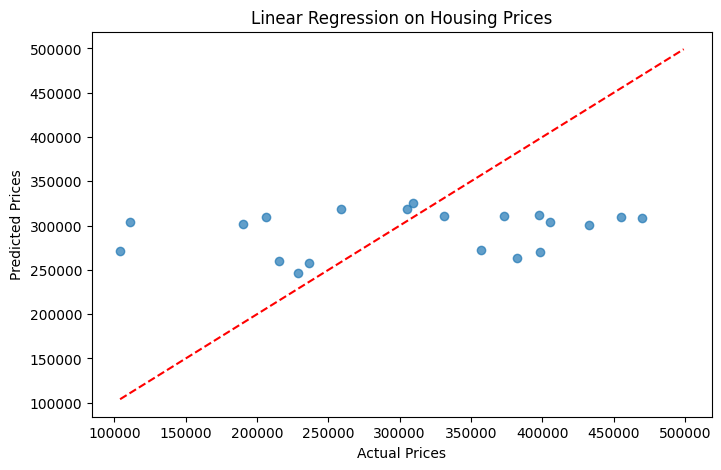

In [3]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Simulate a dataset
np.random.seed(42)
data = {
    "Square_Footage": np.random.randint(500, 4000, 100),
    "Bedrooms": np.random.randint(1, 6, 100),
    "Location": np.random.choice(["Urban", "Suburban", "Rural"], 100),
    "Price": np.random.randint(100000, 500000, 100),
}

df = pd.DataFrame(data)

# Convert categorical variable (Location) into dummy variables
df = pd.get_dummies(df, columns=["Location"], drop_first=True)

# Define features and target
X = df.drop(columns="Price")
y = df["Price"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression on Housing Prices")
plt.show()